In [1]:
import pandas as pd


In [2]:
#loading the dataset from the folder
pds_data=pd.read_csv('/content/raw_data/StudentsPerformance.csv')


In [3]:
pds_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
pds_data['gender'].replace(['female', 'male'],
                        [0, 1], inplace=True)
pds_data['test preparation course'].replace(['none', 'completed'],
                        [0, 1], inplace=True)

#Creating a new column total score
pds_data['Total score'] = pds_data['math score'] + pds_data['writing score'] + pds_data['reading score']


In [7]:
pds_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,0,group B,bachelor's degree,standard,0,72,72,74,218
1,0,group C,some college,standard,1,69,90,88,247
2,0,group B,master's degree,standard,0,90,95,93,278
3,1,group A,associate's degree,free/reduced,0,47,57,44,148
4,1,group C,some college,standard,0,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,standard,1,88,99,95,282
996,1,group C,high school,free/reduced,0,62,55,55,172
997,0,group C,high school,free/reduced,1,59,71,65,195
998,0,group D,some college,standard,1,68,78,77,223


In [9]:
#dropping of the rows if na occurances
clean_data=pds_data.dropna()
clean_data


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,0,group B,bachelor's degree,standard,0,72,72,74,218
1,0,group C,some college,standard,1,69,90,88,247
2,0,group B,master's degree,standard,0,90,95,93,278
3,1,group A,associate's degree,free/reduced,0,47,57,44,148
4,1,group C,some college,standard,0,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,standard,1,88,99,95,282
996,1,group C,high school,free/reduced,0,62,55,55,172
997,0,group C,high school,free/reduced,1,59,71,65,195
998,0,group D,some college,standard,1,68,78,77,223


In [13]:
clean_data.to_csv('/content/clean_data/clean_data.csv')


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [17]:
data_clean=pd.read_csv('/content/clean_data/clean_data.csv')

In [18]:
data_clean

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,0,0,group B,bachelor's degree,standard,0,72,72,74,218
1,1,0,group C,some college,standard,1,69,90,88,247
2,2,0,group B,master's degree,standard,0,90,95,93,278
3,3,1,group A,associate's degree,free/reduced,0,47,57,44,148
4,4,1,group C,some college,standard,0,76,78,75,229
...,...,...,...,...,...,...,...,...,...,...
995,995,0,group E,master's degree,standard,1,88,99,95,282
996,996,1,group C,high school,free/reduced,0,62,55,55,172
997,997,0,group C,high school,free/reduced,1,59,71,65,195
998,998,0,group D,some college,standard,1,68,78,77,223


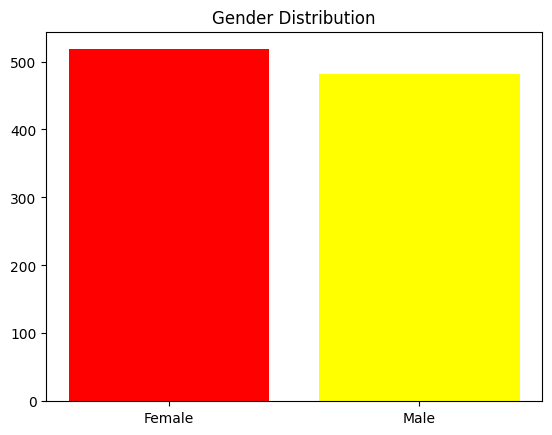

In [21]:
#Visualisation1

# Lets find the gender distribution among the dataset we gathered.

plt.bar(data_clean['gender'].value_counts().index,
       data_clean['gender'].value_counts().values,
       color = ['red', 'yellow'])
plt.title('Gender Distribution')
plt.xticks(data_clean['gender'].value_counts().index,['Female','Male'])
plt.savefig('genderdistribution.png')

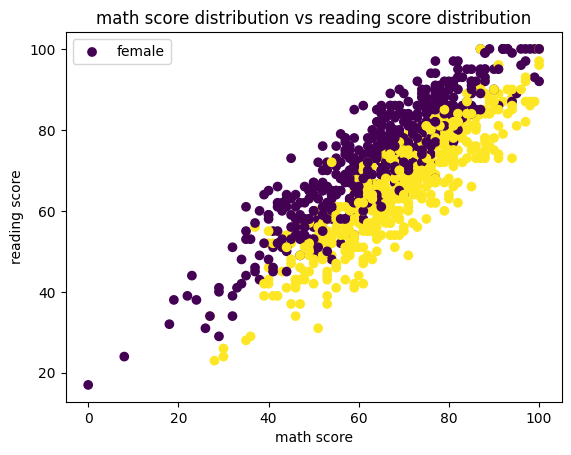

In [22]:
#Visualisation2

#Graph representing correlation between math score and reading score of male & female
plt.scatter(data_clean['math score'], data_clean['reading score'], c=data_clean['gender'])
plt.legend(['female'])
plt.xlabel('math score')
plt.ylabel('reading score')
plt.title('math score distribution vs reading score distribution')
plt.savefig('mathvsreadingdistribution.png')

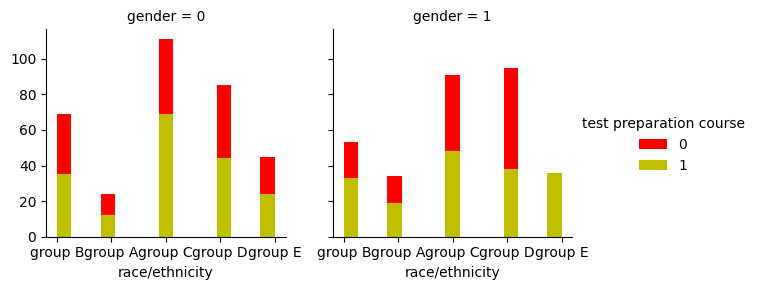

In [24]:
#Visualisation3

graph = sns.FacetGrid(data_clean, col ='gender',hue_kws={'color': ['r', 'y']}, hue ='test preparation course')
# map the above form facetgrid with some attributes
graph.map(plt.hist, 'race/ethnicity', bins = 15, color ='orange').add_legend()
# show the object
plt.savefig('coursecompletiondistribution.png')

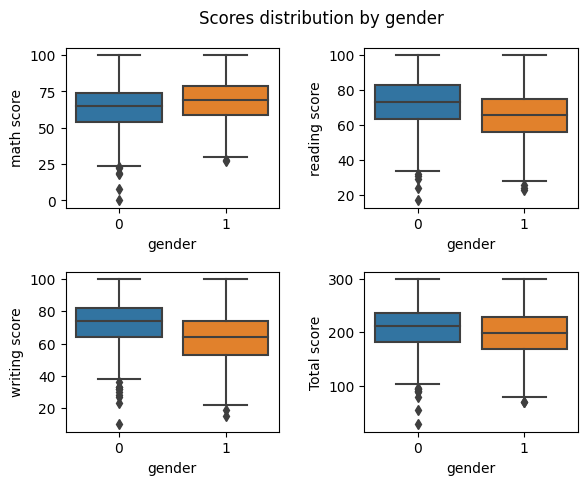

In [25]:
#Visualisation 2

# different scores distribution based on gender
figure, axis = plt.subplots(2, 2)


sns.boxplot(x=data_clean['gender'],y=data_clean['math score'],ax=axis[0,0])
sns.boxplot(x=data_clean['gender'],y=data_clean['reading score'],ax=axis[0,1])
sns.boxplot(x=data_clean['gender'],y=data_clean['writing score'],ax=axis[1,0])
sns.boxplot(x=data_clean['gender'],y=data_clean['Total score'],ax=axis[1,1])
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.suptitle('Scores distribution by gender')
plt.savefig('scoresdistribution.png')
